In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lb = "##############\n"
dataset = '/content/drive/MyDrive/Sem10/Natural_Language_Processing/Spotify Million Song Dataset_exported.csv'


# General Observations

In [ ]:
songs_df = pd.read_csv(dataset)
songs_df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


In [ ]:
def observe_df(df):
    display(df.info())
    print(f"{lb}Unique Value Count")
    display(df.nunique())
    print(f"{lb}Description of numerical columns")
    display(df.describe())
    print(f"{lb}Description of categorical columns")
    display(df.describe(include=object))


In [ ]:
observe_df(songs_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


None

##############
Unique Value Count


artist      643
song      44824
link      57650
text      57494
dtype: int64

##############
Description of numerical columns


,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


##############
Description of categorical columns


,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


*   643 unique artists
*   "song link" and "song" columns are irrelevant and will be dropped
*   No null values





In [ ]:
songs_df_clean = songs_df.drop(columns=["link","song"])
songs_df_clean

,artist,text
0,ABBA,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,I'll never know why I had to go \nWhy I had t...
3,ABBA,Making somebody happy is a question of give an...
4,ABBA,Making somebody happy is a question of give an...
...,...,...
57645,Ziggy Marley,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Power to the workers \nMore power \nPower to...
57647,Zwan,all you need \nis something i'll believe \nf...
57648,Zwan,northern star \nam i frightened \nwhere can ...




*   Limitation: There is no genre present in the dataset - will have to be added

*   The Genre is extracted through web-scraping from wikipedia





# Web Scraping for the Artist Genre

Isolating the unique artist names for more efficient scraping

In [ ]:
artist_df = pd.DataFrame()

artist_df["artist"] = songs_df_clean["artist"]
artist_df.drop_duplicates(inplace=True)
artist_df.reset_index(inplace=True)
artist_df.drop(columns=["index"],inplace=True)
artist_df["artist"] = artist_df["artist"].astype('string')
artist_df

NameError: name 'songs_df_clean' is not defined

Scraping Wikipedia to get the artist genres


*   To simplify the process, only the first genre is scraped


*   There are 51 "artists" that are not actually artists/bands, and therefore will be removed from the dataset


*   All genres grouped into five major groups: Pop, Rock, Country, Hip-Hop and R&B


In [ ]:
import requests
from bs4 import BeautifulSoup

def get_genre(artist):

  data = {}
  alt_urls = ["","_(band)","_(singer)"]

  for x in alt_urls:

    url = 'https://en.wikipedia.org/wiki/' + str(artist) + x

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    infobox = soup.find(class_='infobox')
    try:
      rows = infobox.find_all('tr')
    except:
      continue
    else:
      for row in rows:
          th = row.find('th')
          td = row.find('td')
          if th and td:
              data[th.text.strip()] = td.text.strip()

    try:
      return data["Genres"].split("\n")[0]
    except:
      continue

  return float('nan')


In [ ]:
artist_df["genre"] = artist_df["artist"].apply(get_genre)

In [ ]:
display(artist_df.genre.unique())
artist_df['genre'].isna().sum()

# Grouping the Genres

In [ ]:
import re
# Pop, Rock, Country, Hip-Hop and R&B

def simplify_genre(genre):
  pop_count = rock_count = country_count = hh_count = rnb_count = 0
  rock_syn = ["rock","alt","metal"]
  country_syn = ["country","folk","celtic"]
  hh_syn = ["hip hop","reggae"]
  rnb_syn = ["blues","r&b","gospel"]

  if type(genre) is not float:

    pop_count = len(re.findall('(?=(pop))', genre.lower().strip()))

    for syn in rock_syn:
      regex = '(?=(%s))' % syn
      rock_count = rock_count + len(re.findall(regex, genre.lower().strip()))
    for syn in country_syn:
      regex = '(?=(%s))' % syn
      country_count = country_count + len(re.findall(regex, genre.lower().strip()))

    for syn in hh_syn:
      regex = '(?=(%s))' % syn
      hh_count = hh_count + len(re.findall(regex, genre.lower().strip()))

    for syn in rnb_syn:
      regex = '(?=(%s))' % syn
      rnb_count = rnb_count + len(re.findall(regex, genre.lower().strip()))

    counts = [pop_count, rock_count, country_count, hh_count, rnb_count]
    max_index = counts.index(max(counts))

    if max_index == 0:
      return "pop"
    elif max_index == 1:
      return "rock"
    elif max_index == 2:
      return "country"
    elif max_index == 3:
      return "hip hop"
    elif max_index == 4:
      return "r&b"
    else:
      return genre

  return genre


In [ ]:
artist_grouped = artist_df
artist_grouped["genre"] = artist_grouped["genre"].apply(simplify_genre)
display(artist_grouped)
artist_grouped.genre.unique()

,artist,genre
0,ABBA,pop
1,Ace Of Base,pop
2,Adam Sandler,pop
3,Adele,pop
4,Aerosmith,rock
...,...,...
638,Joseph And The Amazing Technicolor Dreamcoat,NaN
639,Soundtracks,NaN
640,Van Der Graaf Generator,rock
641,Various Artists,NaN


array(['pop', 'rock', 'country', nan, 'r&b', 'hip hop'], dtype=object)

Now, we map the artists and their genres to the original dataframe

In [ ]:
# def create_map(df):
#   mapping = {}

mapping = {}

# mapping[artist_grouped.artist] = artist_grouped.genre
artists = artist_grouped.artist.to_dict()
genres = artist_grouped.genre.to_dict()

for a in artists.keys():
  mapping[artists.get(a)] = genres.get(a)

mapping

In [ ]:
songs_df_mapped = songs_df_clean

songs_df_mapped["genre"] = songs_df_mapped["artist"].map(mapping)
songs_df_mapped

,artist,text,genre
0,ABBA,"Look at her face, it's a wonderful face \nAnd...",pop
1,ABBA,"Take it easy with me, please \nTouch me gentl...",pop
2,ABBA,I'll never know why I had to go \nWhy I had t...,pop
3,ABBA,Making somebody happy is a question of give an...,pop
4,ABBA,Making somebody happy is a question of give an...,pop
...,...,...,...
57645,Ziggy Marley,Irie days come on play \nLet the angels fly l...,hip hop
57646,Ziggy Marley,Power to the workers \nMore power \nPower to...,hip hop
57647,Zwan,all you need \nis something i'll believe \nf...,rock
57648,Zwan,northern star \nam i frightened \nwhere can ...,rock


Next, we drop the columns without any genres

In [ ]:
songs_df_mapped.isna().sum()
songs_df_mapped.dropna(inplace=True)
songs_df_mapped.isna().sum()
songs_df_mapped

,artist,text,genre
0,ABBA,"Look at her face, it's a wonderful face \nAnd...",pop
1,ABBA,"Take it easy with me, please \nTouch me gentl...",pop
2,ABBA,I'll never know why I had to go \nWhy I had t...,pop
3,ABBA,Making somebody happy is a question of give an...,pop
4,ABBA,Making somebody happy is a question of give an...,pop
...,...,...,...
57645,Ziggy Marley,Irie days come on play \nLet the angels fly l...,hip hop
57646,Ziggy Marley,Power to the workers \nMore power \nPower to...,hip hop
57647,Zwan,all you need \nis something i'll believe \nf...,rock
57648,Zwan,northern star \nam i frightened \nwhere can ...,rock


Lastly, we save the mapped dataset

In [ ]:
songs_df_mapped.to_csv('/content/drive/MyDrive/Sem10/Natural_Language_Processing/spotify_million_song_dataset_mapped.csv')

# Analysis (I)

In [8]:
path = '/content/drive/MyDrive/Sem10/Natural_Language_Processing/'
songs_df_mapped = pd.read_csv(path + 'spotify_million_song_dataset_mapped.csv')
songs_df_mapped.drop(columns=["Unnamed: 0"],inplace=True)
songs_df_mapped

,artist,text,genre
0,ABBA,"Look at her face, it's a wonderful face \nAnd...",pop
1,ABBA,"Take it easy with me, please \nTouch me gentl...",pop
2,ABBA,I'll never know why I had to go \nWhy I had t...,pop
3,ABBA,Making somebody happy is a question of give an...,pop
4,ABBA,Making somebody happy is a question of give an...,pop
...,...,...,...
55243,Ziggy Marley,Irie days come on play \nLet the angels fly l...,hip hop
55244,Ziggy Marley,Power to the workers \nMore power \nPower to...,hip hop
55245,Zwan,all you need \nis something i'll believe \nf...,rock
55246,Zwan,northern star \nam i frightened \nwhere can ...,rock


In [9]:
def plot_bar(data,title,xlabel,ylabel,vertical):
  print(data)
  plt.title(title)
  plt.xlabel(xlabel if vertical else ylabel)
  plt.ylabel(ylabel if vertical else xlabel)
  sns.barplot(x=data.index if vertical else data, y=data if vertical else data.index, palette="pastel")
  plt.xticks(rotation=90 if vertical else 0)
  plt.show()
  plt.savefig(fname=path+str(title).lower(),bbox_inches='tight')


rock       23700
pop        20524
country     6605
hip hop     2428
r&b         1991
Name: genre, dtype: int64


<ipython-input-9-684919d24cb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index if vertical else data, y=data if vertical else data.index, palette="pastel")


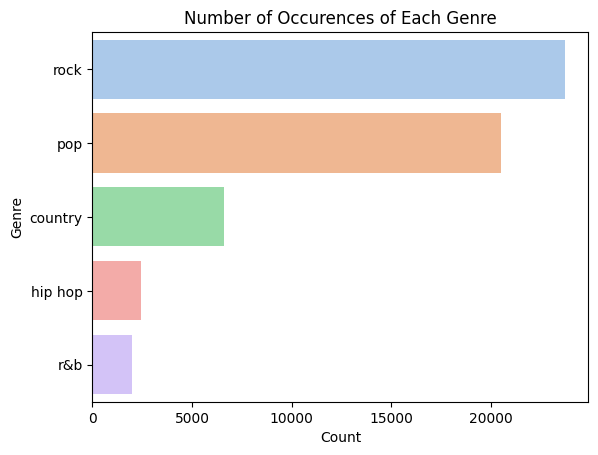

<Figure size 640x480 with 0 Axes>

In [10]:
plot_bar(songs_df_mapped['genre'].value_counts(),"Number of Occurences of Each Genre","Genre","Count",False)



*   Heavily biased Dataset with the "Rock" and "Pop" Genres making up 80% of occurences


In [11]:
def get_sentence_count(text):
  return len(text.split('\n'))

In [12]:
def get_word_count(text):
  word_count = 0
  for sentence in text.split('\n'):
    word_count = word_count + len(sentence.split(" "))
  return word_count

In [13]:
songs_df_analysis = songs_df_mapped
songs_df_analysis["sentence_count"] = songs_df_analysis["text"].apply(get_sentence_count)
songs_df_analysis["word_count"] = songs_df_analysis["text"].apply(get_word_count)


genre
country    34.895534
hip hop    66.753707
pop        43.537468
r&b        46.932195
rock       40.065190
Name: sentence_count, dtype: float64


<ipython-input-9-684919d24cb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index if vertical else data, y=data if vertical else data.index, palette="pastel")


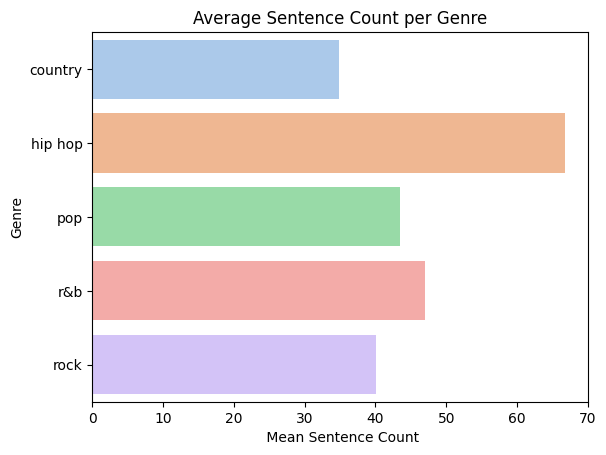

genre
country    269.361998
hip hop    564.447282
pop        307.698353
r&b        350.831743
rock       284.141266
Name: word_count, dtype: float64


<ipython-input-9-684919d24cb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index if vertical else data, y=data if vertical else data.index, palette="pastel")


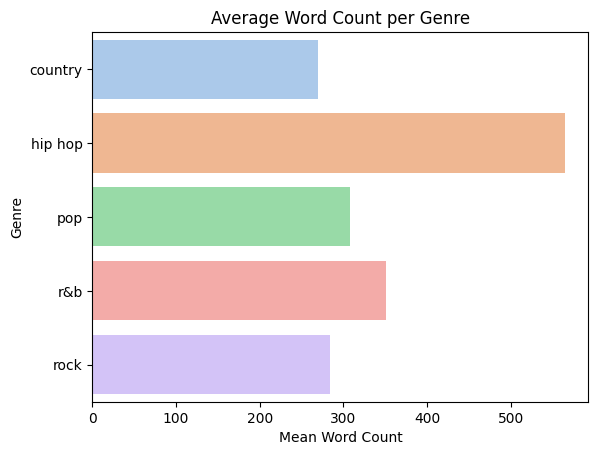

<Figure size 640x480 with 0 Axes>

In [14]:
plot_bar(songs_df_analysis.groupby(['genre'])['sentence_count'].mean(),"Average Sentence Count per Genre","Genre"," Mean Sentence Count",False)
plot_bar(songs_df_analysis.groupby(['genre'])['word_count'].mean(),"Average Word Count per Genre","Genre","Mean Word Count",False)

In [18]:
songs_df_analysis.to_csv('/content/drive/MyDrive/Sem10/Natural_Language_Processing/spotify_million_song_dataset_analysis.csv')

# Normalization

In [2]:
import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
songs_df_analysis = pd.read_csv('/content/drive/MyDrive/Sem10/Natural_Language_Processing/spotify_million_song_dataset_lemmatized_text.csv')
songs_df_analysis

,Unnamed: 0,artist,text,genre,sentence_count,word_count,text_normalized
0,0,ABBA,"Look at her face, it's a wonderful face \nAnd...",pop,21,194,"['squeeze', 'leaf', 'mean', 'wonderful', ""'s"",..."
1,1,ABBA,"Take it easy with me, please \nTouch me gentl...",pop,54,369,"['slow', 'time', ')', 'breeze', 'oh', 'know', ..."
2,2,ABBA,I'll never know why I had to go \nWhy I had t...,pop,40,393,"['stay', 'better', 'used', ""'s"", ""'m"", 'notion..."
3,3,ABBA,Making somebody happy is a question of give an...,pop,41,283,"['use', 'hum-de-hum-hum', 'yes', 'touch', 'dum..."
4,4,ABBA,Making somebody happy is a question of give an...,pop,41,281,"['use', 'hum-de-hum-hum', 'yes', 'touch', 'aro..."
...,...,...,...,...,...,...,...
55243,55243,Ziggy Marley,Irie days come on play \nLet the angels fly l...,hip hop,29,235,"['year', 'peace', 'use', 'put', 'ali', 'old', ..."
55244,55244,Ziggy Marley,Power to the workers \nMore power \nPower to...,hip hop,85,751,"['zone', 'ziggy', 'wha', 'naah', 'notion', 'ha..."
55245,55245,Zwan,all you need \nis something i'll believe \nf...,rock,67,411,"['stay', 'underground', 'gate', ')', 'younger'..."
55246,55246,Zwan,northern star \nam i frightened \nwhere can ...,rock,50,242,"['time', 'enlighten', 'afraid', 'use', 'lost',..."


In [39]:
wordnet_lemmatizer = WordNetLemmatizer()
def normalize(text):
  text_tokenized = {}
  text_lemmatized = []
  text_no_stop = []

  for sentence in text.split("\n"):
    text_tokenized = set(text_tokenized) | set(nltk.word_tokenize(text.lower().strip()))

  for word in text_tokenized:
    text_lemmatized.append(wordnet_lemmatizer.lemmatize(word))

  nltk_stop_words = set(stopwords.words('english'))
  for word in text_lemmatized:
      if word not in nltk_stop_words:
          text_no_stop.append(word)

  punctuations="?:!.,;"
  for word in text_no_stop:
      if word in punctuations:
          text_no_stop.remove(word)

  return text_no_stop

In [40]:
songs_df_analysis["text_normalized"] = songs_df_analysis["text"].apply(normalize)
songs_df_analysis

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
50249
50250
50251
50252
50253
50254
50255
50256
50257
50258
50259
50260
50261
50262
50263
50264
50265
50266
50267
50268
50269
50270
50271
50272
50273
50274
50275
50276
50277
50278
50279
50280
50281
50282
50283
50284
50285
50286
50287
50288
50289
50290
50291
50292
50293
50294
50295
50296
50297
50298
50299
50300
50301
50302
50303
50304
50305
50306
50307
50308
50309
50310
50311
50312
50313
50314
50315
50316
50317
50318
50319
50320
50321
50322
50323
50324
50325
50326
50327
50328
50329
50330
50331
50332
50333
50334
50335
50336
50337
50338
50339
50340
50341
50342
50343
50344
50345
50346
50347
50348
50349
50350
50351
50352
50353
50354
50355
50356
50357
50358
50359
50360
50361
50362
50363
50364
50365
50366
50367
50368
50369
50370
50371
50372
50373
50374
50375
50376
50377
50378
50379
50380
50381
50382
50383
50384
50385
50386
50387
50388
50389
50390
50391
50392
50393
50394
50395
50396
50397
50398
50399
50400
50401
50402
50403
504

,artist,text,genre,sentence_count,word_count,text_normalized
0,ABBA,"Look at her face, it's a wonderful face \nAnd...",pop,21,194,"[squeeze, leaf, mean, wonderful, 's, fellow, '..."
1,ABBA,"Take it easy with me, please \nTouch me gentl...",pop,54,369,"[slow, time, ), breeze, oh, know, please, soul..."
2,ABBA,I'll never know why I had to go \nWhy I had t...,pop,40,393,"[stay, better, used, 's, 'm, notion, yes, lous..."
3,ABBA,Making somebody happy is a question of give an...,pop,41,283,"[use, hum-de-hum-hum, yes, touch, dum-be-dum-d..."
4,ABBA,Making somebody happy is a question of give an...,pop,41,281,"[use, hum-de-hum-hum, yes, touch, around, tune..."
...,...,...,...,...,...,...
55243,Ziggy Marley,Irie days come on play \nLet the angels fly l...,hip hop,29,235,"[year, peace, use, put, ali, old, 's, fly, day..."
55244,Ziggy Marley,Power to the workers \nMore power \nPower to...,hip hop,85,751,"[zone, ziggy, wha, naah, notion, hand, telling..."
55245,Zwan,all you need \nis something i'll believe \nf...,rock,67,411,"[stay, underground, gate, ), younger, call, 's..."
55246,Zwan,northern star \nam i frightened \nwhere can ...,rock,50,242,"[time, enlighten, afraid, use, lost, please, s..."



# Vocabulary Extraction

In [44]:
vocabulary = []

def get_vocabulary(text):
  global vocabulary

  for word in text:
    if word not in vocabulary:
      vocabulary.append(word)


In [45]:
songs_df_analysis["text_normalized"].apply(get_vocabulary)
len(vocabulary)

85995

In [46]:
# open file
with open(path +'vocabulary.txt', 'w+') as f:

    # write elements of list
    for items in vocabulary:
        f.write('%s\n' %items)

    print("File written successfully")

# close the file
f.close()

File written successfully


In [4]:
def lower_text(text):
  return text.replace("\n"," ").lower().strip()

In [5]:
songs_df_analysis["text_lower"] = songs_df_analysis["text"].apply(lower_text)
songs_df_analysis

,Unnamed: 0,artist,text,genre,sentence_count,word_count,text_normalized,text_lower
0,0,ABBA,"Look at her face, it's a wonderful face \nAnd...",pop,21,194,"['squeeze', 'leaf', 'mean', 'wonderful', ""'s"",...","look at her face, it's a wonderful face and ..."
1,1,ABBA,"Take it easy with me, please \nTouch me gentl...",pop,54,369,"['slow', 'time', ')', 'breeze', 'oh', 'know', ...","take it easy with me, please touch me gently..."
2,2,ABBA,I'll never know why I had to go \nWhy I had t...,pop,40,393,"['stay', 'better', 'used', ""'s"", ""'m"", 'notion...",i'll never know why i had to go why i had to...
3,3,ABBA,Making somebody happy is a question of give an...,pop,41,283,"['use', 'hum-de-hum-hum', 'yes', 'touch', 'dum...",making somebody happy is a question of give an...
4,4,ABBA,Making somebody happy is a question of give an...,pop,41,281,"['use', 'hum-de-hum-hum', 'yes', 'touch', 'aro...",making somebody happy is a question of give an...
...,...,...,...,...,...,...,...,...
55243,55243,Ziggy Marley,Irie days come on play \nLet the angels fly l...,hip hop,29,235,"['year', 'peace', 'use', 'put', 'ali', 'old', ...",irie days come on play let the angels fly le...
55244,55244,Ziggy Marley,Power to the workers \nMore power \nPower to...,hip hop,85,751,"['zone', 'ziggy', 'wha', 'naah', 'notion', 'ha...",power to the workers more power power to t...
55245,55245,Zwan,all you need \nis something i'll believe \nf...,rock,67,411,"['stay', 'underground', 'gate', ')', 'younger'...",all you need is something i'll believe fla...
55246,55246,Zwan,northern star \nam i frightened \nwhere can ...,rock,50,242,"['time', 'enlighten', 'afraid', 'use', 'lost',...",northern star am i frightened where can i ...


In [6]:
vocabulary = []
with open('/content/drive/MyDrive/Sem10/Natural_Language_Processing/vocabulary.txt') as f:
    vocabulary = f.read().splitlines()

print(vocabulary[:11])

['squeeze', 'leaf', 'mean', 'wonderful', "'s", 'fellow', "'m", 'face', 'walk', 'hand', 'girl']


In [8]:
import re
genres = ["pop","rock","country","hip hop", "r&b"]
wf_per_genre = {}

for genre in genres:
  wf_per_genre[genre] = {}

def get_word_frequency_per_genre(df):
  global wf_per_genre

  for word in vocabulary:
    try:
      wf_per_genre["pop"][word] = df[df['genre'] == "pop"].text_lower.str.count(word).sum()
      wf_per_genre["rock"][word] = df[df['genre'] == "rock"].text_lower.str.count(word).sum()
      wf_per_genre["country"][word] = df[df['genre'] == "country"].text_lower.str.count(word).sum()
      wf_per_genre["hip hop"][word] = df[df['genre'] == "hip hop"].text_lower.str.count(word).sum()
      wf_per_genre["r&b"][word] = df[df['genre'] == "r&b"].text_lower.str.count(word).sum()
    except:
      wf_per_genre["pop"][re.escape(word)] = df[df['genre'] == "pop"].text_lower.str.count(re.escape(word)).sum()
      wf_per_genre["rock"][re.escape(word)] = df[df['genre'] == "rock"].text_lower.str.count(re.escape(word)).sum()
      wf_per_genre["country"][re.escape(word)] = df[df['genre'] == "country"].text_lower.str.count(re.escape(word)).sum()
      wf_per_genre["hip hop"][re.escape(word)] = df[df['genre'] == "hip hop"].text_lower.str.count(re.escape(word)).sum()
      wf_per_genre["r&b"][re.escape(word)] = df[df['genre'] == "r&b"].text_lower.str.count(re.escape(word)).sum()


In [ ]:
get_word_frequency_per_genre(songs_df_analysis)